In [1]:
import batman
import emcee
import glob
import os
import shutil
import math
import corner
import numba
import itertools

import numpy       as np
import pandas      as pd
import time        as tm 
import lightkurve  as lk
# import mr_forecast as mr

import matplotlib                      as mpl
import matplotlib.pyplot               as plt
import matplotlib.gridspec             as gridspec
from   matplotlib.backends.backend_pdf import PdfPages
import mpl_axes_aligner


import astropy.io.fits    as apf
import astropy.units      as units
from   astropy.stats      import sigma_clip
from   astropy.wcs        import WCS
from   astropy.timeseries import BoxLeastSquares
from   astroquery.mast    import Catalogs
from   astroquery         import svo_fps

from multiprocessing import Pool, Process
from wotan           import flatten
from functools       import partial
from ldtk            import LDPSetCreator, BoxcarFilter, TabulatedFilter, SVOFilter
from ldtk.filters    import tess, sdss_z
from IPython.display import display, HTML
from tqdm.auto       import tqdm


# import eleanor

# import warnings
# warnings.filterwarnings("ignore")
# display(HTML("<style>.container { width:95% !important; }</style>"))

from Functions_all import *
# from Executing_code_part_2_init_single_search import *
from Executing_code_part_0_just_getting_data import *
# from Executing_code_part_2_init_single_search import *
# from Executing_code_part_5_final_singles_search_and_figures import *
import gc



In [36]:
t[:400]

array([0.        , 0.020004  , 0.040008  , 0.060012  , 0.080016  ,
       0.10002   , 0.120024  , 0.14002801, 0.16003201, 0.18003601,
       0.20004001, 0.22004401, 0.24004801, 0.26005201, 0.28005601,
       0.30006001, 0.32006401, 0.34006801, 0.36007201, 0.38007602,
       0.40008002, 0.42008402, 0.44008802, 0.46009202, 0.48009602,
       0.50010002, 0.52010402, 0.54010802, 0.56011202, 0.58011602,
       0.60012002, 0.62012402, 0.64012803, 0.66013203, 0.68013603,
       0.70014003, 0.72014403, 0.74014803, 0.76015203, 0.78015603,
       0.80016003, 0.82016403, 0.84016803, 0.86017203, 0.88017604,
       0.90018004, 0.92018404, 0.94018804, 0.96019204, 0.98019604,
       1.00020004, 1.02020404, 1.04020804, 1.06021204, 1.08021604,
       1.10022004, 1.12022404, 1.14022805, 1.16023205, 1.18023605,
       1.20024005, 1.22024405, 1.24024805, 1.26025205, 1.28025605,
       1.30026005, 1.32026405, 1.34026805, 1.36027205, 1.38027606,
       1.40028006, 1.42028406, 1.44028806, 1.46029206, 1.48029

In [41]:
t = np.linspace(0, 20, 1000)

T0=2
period = 20
duration = 0.5
intransit = np.abs((t - T0 + (0.5 * period)) % period - (0.5 * period)) < duration/2
# len(np.where(intransit == False)[0])
t[intransit]

array([1.76176176, 1.78178178, 1.8018018 , 1.82182182, 1.84184184,
       1.86186186, 1.88188188, 1.9019019 , 1.92192192, 1.94194194,
       1.96196196, 1.98198198, 2.002002  , 2.02202202, 2.04204204,
       2.06206206, 2.08208208, 2.1021021 , 2.12212212, 2.14214214,
       2.16216216, 2.18218218, 2.2022022 , 2.22222222, 2.24224224])

In [2]:
target_files = sorted(glob.glob('./toi_data/target_*'))

for target in target_files:
    main(target)

target file ./toi_data/target_tic-102734241_gaiaID-2034047656176989952_data_data_data
getting star params
fits ./toi_data/target_tic-102734241_gaiaID-2034047656176989952_data_data_data/hlsp_tglc_tess_ffi_gaiaid-2034047656176989952-s0014-cam1-ccd1_tess_v1_llc.fits
sector  14
fits ./toi_data/target_tic-102734241_gaiaID-2034047656176989952_data_data_data/hlsp_tglc_tess_ffi_gaiaid-2034047656176989952-s0041-cam1-ccd2_tess_v1_llc.fits
sector  41
total file ['./toi_data/target_tic-102734241_gaiaID-2034047656176989952_data_data_data/target_tic-102734241_gaiaID-2034047656176989952_TGLC_APER_total.csv', './toi_data/target_tic-102734241_gaiaID-2034047656176989952_data_data_data/target_tic-102734241_gaiaID-2034047656176989952_data_TGLC_APER_total.csv', './toi_data/target_tic-102734241_gaiaID-2034047656176989952_data_data_data/target_tic-102734241_gaiaID-2034047656176989952_data_data_TGLC_APER_total.csv', './toi_data/target_tic-102734241_gaiaID-2034047656176989952_data_data_data/target_tic-10273424

  0%|          | 0/0 targets | 00:00<?

we have a problem
fits ./toi_data/target_tic-142937186_gaiaID-50556639732970/hlsp_tglc_tess_ffi_gaiaid-5055663973297050624-s0031-cam2-ccd1_tess_v1_llc.fits
sector  31
total file ['./toi_data/target_tic-142937186_gaiaID-50556639732970/target_tic-142937186_gaiaID-50556639732970_TGLC_APER_total.csv']
got data for ticid:  142937186
target file ./toi_data/target_tic-144700903_gaiaID-3340265717587057536
getting star params
fits ./toi_data/target_tic-144700903_gaiaID-3340265717587057536/hlsp_tglc_tess_ffi_gaiaid-3340265717587057536-s0006-cam1-ccd4_tess_v1_llc.fits
sector  6
total file ['./toi_data/target_tic-144700903_gaiaID-3340265717587057536/target_tic-144700903_gaiaID-3340265717587057536_TGLC_APER_total.csv']
got data for ticid:  144700903
target file ./toi_data/target_tic-151825527_gaiaID-5396580575830873728
getting star params
fits ./toi_data/target_tic-151825527_gaiaID-5396580575830873728/hlsp_tglc_tess_ffi_gaiaid-5396580575830873728-s0036-cam2-ccd3_tess_v1_llc.fits
sector  36
fits ./t

  0%|          | 0/1 targets | 00:00<?

fits ./toi_data/target_tic-153078576_gaiaID-48470013022774/hlsp_tglc_tess_ffi_gaiaid-4847001302277419904-s0030-cam3-ccd1_tess_v1_llc.fits
sector  30
fits ./toi_data/target_tic-153078576_gaiaID-48470013022774/hlsp_tglc_tess_ffi_gaiaid-4847001302277419904-s0031-cam3-ccd2_tess_v1_llc.fits
sector  31
fits ./toi_data/target_tic-153078576_gaiaID-48470013022774/hlsp_tglc_tess_ffi_gaiaid-4847001302277419904-s0003-cam3-ccd1_tess_v1_llc.fits
sector  3
fits ./toi_data/target_tic-153078576_gaiaID-48470013022774/hlsp_tglc_tess_ffi_gaiaid-4847001302277419904-s0004-cam3-ccd2_tess_v1_llc.fits
sector  4
total file ['./toi_data/target_tic-153078576_gaiaID-48470013022774/target_tic-153078576_gaiaID-48470013022774_TGLC_APER_total.csv']
got data for ticid:  153078576
target file ./toi_data/target_tic-155867025_gaiaID-178924390478792320
getting star params
fits ./toi_data/target_tic-155867025_gaiaID-178924390478792320/hlsp_tglc_tess_ffi_gaiaid-178924390478792320-s0019-cam1-ccd3_tess_v1_llc.fits
sector  19
t

fits ./toi_data/target_tic-198485881_gaiaID-1716345832872291968/hlsp_tglc_tess_ffi_gaiaid-1716345832872291968-s0041-cam4-ccd2_tess_v1_llc.fits
sector  41
fits ./toi_data/target_tic-198485881_gaiaID-1716345832872291968/hlsp_tglc_tess_ffi_gaiaid-1716345832872291968-s0026-cam4-ccd1_tess_v1_llc.fits
sector  26
fits ./toi_data/target_tic-198485881_gaiaID-1716345832872291968/hlsp_tglc_tess_ffi_gaiaid-1716345832872291968-s0014-cam4-ccd2_tess_v1_llc.fits
sector  14
fits ./toi_data/target_tic-198485881_gaiaID-1716345832872291968/hlsp_tglc_tess_ffi_gaiaid-1716345832872291968-s0021-cam3-ccd4_tess_v1_llc.fits
sector  21
fits ./toi_data/target_tic-198485881_gaiaID-1716345832872291968/hlsp_tglc_tess_ffi_gaiaid-1716345832872291968-s0020-cam3-ccd3_tess_v1_llc.fits
sector  20
total file ['./toi_data/target_tic-198485881_gaiaID-1716345832872291968/target_tic-198485881_gaiaID-1716345832872291968_TGLC_APER_total.csv', './toi_data/target_tic-198485881_gaiaID-1716345832872291968/target_tic-198485881_gaiaID-

total file ['./toi_data/target_tic-220479565_gaiaID-4770828304936109056/target_tic-220479565_gaiaID-4770828304936109056_TGLC_APER_total.csv', './toi_data/target_tic-220479565_gaiaID-4770828304936109056/target_tic-220479565_gaiaID-4770828304936109056_data_TGLC_APER_total.csv']
got data for ticid:  220479565
target file ./toi_data/target_tic-22233480_gaiaID-4606416269652179328
getting star params
fits ./toi_data/target_tic-22233480_gaiaID-4606416269652179328/hlsp_tglc_tess_ffi_gaiaid-4606416269652179328-s0040-cam1-ccd2_tess_v1_llc.fits
sector  40
total file ['./toi_data/target_tic-22233480_gaiaID-4606416269652179328/target_tic-22233480_gaiaID-4606416269652179328_TGLC_APER_total.csv', './toi_data/target_tic-22233480_gaiaID-4606416269652179328/target_tic-22233480_gaiaID-4606416269652179328_data_TGLC_APER_total.csv']
got data for ticid:  22233480
target file ./toi_data/target_tic-230055368_gaiaID-3994047048130880384
getting star params
fits ./toi_data/target_tic-230055368_gaiaID-39940470481

fits ./toi_data/target_tic-235683377_gaiaID-2265154211335825152/hlsp_tglc_tess_ffi_gaiaid-2265154211335825152-s0041-cam3-ccd2_tess_v1_llc.fits
sector  41
fits ./toi_data/target_tic-235683377_gaiaID-2265154211335825152/hlsp_tglc_tess_ffi_gaiaid-2265154211335825152-s0023-cam4-ccd4_tess_v1_llc.fits
sector  23
fits ./toi_data/target_tic-235683377_gaiaID-2265154211335825152/hlsp_tglc_tess_ffi_gaiaid-2265154211335825152-s0019-cam4-ccd1_tess_v1_llc.fits
sector  19
fits ./toi_data/target_tic-235683377_gaiaID-2265154211335825152/hlsp_tglc_tess_ffi_gaiaid-2265154211335825152-s0020-cam4-ccd1_tess_v1_llc.fits
sector  20
fits ./toi_data/target_tic-235683377_gaiaID-2265154211335825152/hlsp_tglc_tess_ffi_gaiaid-2265154211335825152-s0022-cam4-ccd4_tess_v1_llc.fits
sector  22
fits ./toi_data/target_tic-235683377_gaiaID-2265154211335825152/hlsp_tglc_tess_ffi_gaiaid-2265154211335825152-s0016-cam3-ccd2_tess_v1_llc.fits
sector  16
fits ./toi_data/target_tic-235683377_gaiaID-2265154211335825152/hlsp_tglc_te

fits ./toi_data/target_tic-259377017_gaiaID-4781196115469953024/hlsp_tglc_tess_ffi_gaiaid-4781196115469953024-s0032-cam3-ccd3_tess_v1_llc.fits
sector  32
fits ./toi_data/target_tic-259377017_gaiaID-4781196115469953024/hlsp_tglc_tess_ffi_gaiaid-4781196115469953024-s0004-cam3-ccd4_tess_v1_llc.fits
sector  4
fits ./toi_data/target_tic-259377017_gaiaID-4781196115469953024/hlsp_tglc_tess_ffi_gaiaid-4781196115469953024-s0030-cam3-ccd4_tess_v1_llc.fits
sector  30
fits ./toi_data/target_tic-259377017_gaiaID-4781196115469953024/hlsp_tglc_tess_ffi_gaiaid-4781196115469953024-s0005-cam3-ccd3_tess_v1_llc.fits
sector  5
total file ['./toi_data/target_tic-259377017_gaiaID-4781196115469953024/target_tic-259377017_gaiaID-4781196115469953024_TGLC_APER_total.csv', './toi_data/target_tic-259377017_gaiaID-4781196115469953024/target_tic-259377017_gaiaID-4781196115469953024_data_TGLC_APER_total.csv']
got data for ticid:  259377017
target file ./toi_data/target_tic-260004324_gaiaID-5500061456275483776
getting

fits ./toi_data/target_tic-260708537_gaiaID-5482827676662168832/hlsp_tglc_tess_ffi_gaiaid-5482827676662168832-s0012-cam4-ccd3_tess_v1_llc.fits
sector  12
fits ./toi_data/target_tic-260708537_gaiaID-5482827676662168832/hlsp_tglc_tess_ffi_gaiaid-5482827676662168832-s0032-cam4-ccd1_tess_v1_llc.fits
sector  32
fits ./toi_data/target_tic-260708537_gaiaID-5482827676662168832/hlsp_tglc_tess_ffi_gaiaid-5482827676662168832-s0039-cam4-ccd3_tess_v1_llc.fits
sector  39
fits ./toi_data/target_tic-260708537_gaiaID-5482827676662168832/hlsp_tglc_tess_ffi_gaiaid-5482827676662168832-s0004-cam4-ccd1_tess_v1_llc.fits
sector  4
fits ./toi_data/target_tic-260708537_gaiaID-5482827676662168832/hlsp_tglc_tess_ffi_gaiaid-5482827676662168832-s0030-cam4-ccd4_tess_v1_llc.fits
sector  30
total file ['./toi_data/target_tic-260708537_gaiaID-5482827676662168832/target_tic-260708537_gaiaID-5482827676662168832_TGLC_APER_total.csv', './toi_data/target_tic-260708537_gaiaID-5482827676662168832/target_tic-260708537_gaiaID-5

fits ./toi_data/target_tic-284441182_gaiaID-427224073427887360/hlsp_tglc_tess_ffi_gaiaid-427224073427887360-s0024-cam4-ccd4_tess_v1_llc.fits
sector  24
total file ['./toi_data/target_tic-284441182_gaiaID-427224073427887360/target_tic-284441182_gaiaID-427224073427887360_TGLC_APER_total.csv']
got data for ticid:  284441182
target file ./toi_data/target_tic-285048486_gaiaID-1094545653447816064
getting star params
fits ./toi_data/target_tic-285048486_gaiaID-1094545653447816064/hlsp_tglc_tess_ffi_gaiaid-1094545653447816064-s0020-cam2-ccd1_tess_v1_llc.fits
sector  20
total file ['./toi_data/target_tic-285048486_gaiaID-1094545653447816064/target_tic-285048486_gaiaID-1094545653447816064_TGLC_APER_total.csv']
got data for ticid:  285048486
target file ./toi_data/target_tic-286201103_gaiaID-2168280502430898944
getting star params
fits ./toi_data/target_tic-286201103_gaiaID-2168280502430898944/hlsp_tglc_tess_ffi_gaiaid-2168280502430898944-s0016-cam2-ccd3_tess_v1_llc.fits
sector  16
fits ./toi_dat

total file ['./toi_data/target_tic-307210830_gaiaID-5271055243163629056/target_tic-307210830_gaiaID-5271055243163629056_TGLC_APER_total.csv']
got data for ticid:  307210830
target file ./toi_data/target_tic-321669174_gaiaID-1416730563570869376
getting star params
fits ./toi_data/target_tic-321669174_gaiaID-1416730563570869376/hlsp_tglc_tess_ffi_gaiaid-1416730563570869376-s0024-cam2-ccd1_tess_v1_llc.fits
sector  24
fits ./toi_data/target_tic-321669174_gaiaID-1416730563570869376/hlsp_tglc_tess_ffi_gaiaid-1416730563570869376-s0026-cam2-ccd2_tess_v1_llc.fits
sector  26
fits ./toi_data/target_tic-321669174_gaiaID-1416730563570869376/hlsp_tglc_tess_ffi_gaiaid-1416730563570869376-s0021-cam4-ccd3_tess_v1_llc.fits
sector  21
fits ./toi_data/target_tic-321669174_gaiaID-1416730563570869376/hlsp_tglc_tess_ffi_gaiaid-1416730563570869376-s0025-cam2-ccd1_tess_v1_llc.fits
sector  25
fits ./toi_data/target_tic-321669174_gaiaID-1416730563570869376/hlsp_tglc_tess_ffi_gaiaid-1416730563570869376-s0041-cam2

  0%|          | 0/1 targets | 00:00<?

fits ./toi_data/target_tic-332657786_gaiaID-56739345485989/hlsp_tglc_tess_ffi_gaiaid-5673934548598976256-s0035-cam1-ccd2_tess_v1_llc.fits
sector  35
fits ./toi_data/target_tic-332657786_gaiaID-56739345485989/hlsp_tglc_tess_ffi_gaiaid-5673934548598976256-s0008-cam1-ccd2_tess_v1_llc.fits
sector  8
total file ['./toi_data/target_tic-332657786_gaiaID-56739345485989/target_tic-332657786_gaiaID-56739345485989_TGLC_APER_total.csv']
got data for ticid:  332657786
target file ./toi_data/target_tic-335590096_gaiaID-3571038605366263424
getting star params
fits ./toi_data/target_tic-335590096_gaiaID-3571038605366263424/hlsp_tglc_tess_ffi_gaiaid-3571038605366263424-s0036-cam1-ccd3_tess_v1_llc.fits
sector  36
fits ./toi_data/target_tic-335590096_gaiaID-3571038605366263424/hlsp_tglc_tess_ffi_gaiaid-3571038605366263424-s0010-cam1-ccd4_tess_v1_llc.fits
sector  10
total file ['./toi_data/target_tic-335590096_gaiaID-3571038605366263424/target_tic-335590096_gaiaID-3571038605366263424_TGLC_APER_total.csv']

  0%|          | 0/0 targets | 00:00<?

we have a problem
fits ./toi_data/target_tic-357501308_gaiaID-1272123859439770368/hlsp_tglc_tess_ffi_gaiaid-1272123859439770368-s0024-cam1-ccd3_tess_v1_llc.fits
sector  24
total file ['./toi_data/target_tic-357501308_gaiaID-1272123859439770368/target_tic-357501308_gaiaID-1272123859439770368_TGLC_APER_total.csv']
got data for ticid:  357501308
target file ./toi_data/target_tic-359271092_gaiaID-52994404415218
IDs 359271092 52994404415218


  0%|          | 0/1 targets | 00:00<?

fits ./toi_data/target_tic-359271092_gaiaID-52994404415218/hlsp_tglc_tess_ffi_gaiaid-5299440441521812992-s0036-cam3-ccd4_tess_v1_llc.fits
sector  36
fits ./toi_data/target_tic-359271092_gaiaID-52994404415218/hlsp_tglc_tess_ffi_gaiaid-5299440441521812992-s0037-cam3-ccd3_tess_v1_llc.fits
sector  37
fits ./toi_data/target_tic-359271092_gaiaID-52994404415218/hlsp_tglc_tess_ffi_gaiaid-5299440441521812992-s0009-cam3-ccd4_tess_v1_llc.fits
sector  9
fits ./toi_data/target_tic-359271092_gaiaID-52994404415218/hlsp_tglc_tess_ffi_gaiaid-5299440441521812992-s0010-cam3-ccd3_tess_v1_llc.fits
sector  10
total file ['./toi_data/target_tic-359271092_gaiaID-52994404415218/target_tic-359271092_gaiaID-52994404415218_TGLC_APER_total.csv']
got data for ticid:  359271092
target file ./toi_data/target_tic-360156606_gaiaID-5842480953772012928
getting star params
fits ./toi_data/target_tic-360156606_gaiaID-5842480953772012928/hlsp_tglc_tess_ffi_gaiaid-5842480953772012928-s0011-cam3-ccd1_tess_v1_llc.fits
sector  

total file ['./toi_data/target_tic-380887434_gaiaID-2564324345929277184/target_tic-380887434_gaiaID-2564324345929277184_TGLC_APER_total.csv', './toi_data/target_tic-380887434_gaiaID-2564324345929277184/target_tic-380887434_gaiaID-2564324345929277184_data_TGLC_APER_total.csv']
got data for ticid:  380887434
target file ./toi_data/target_tic-382602147_gaiaID-4699702272124241152
IDs 382602147 4699702272124241152


  0%|          | 0/0 targets | 00:00<?

we have a problem
fits ./toi_data/target_tic-382602147_gaiaID-4699702272124241152/hlsp_tglc_tess_ffi_gaiaid-4699702272124241152-s0003-cam3-ccd3_tess_v1_llc.fits
sector  3
fits ./toi_data/target_tic-382602147_gaiaID-4699702272124241152/hlsp_tglc_tess_ffi_gaiaid-4699702272124241152-s0028-cam3-ccd4_tess_v1_llc.fits
sector  28
fits ./toi_data/target_tic-382602147_gaiaID-4699702272124241152/hlsp_tglc_tess_ffi_gaiaid-4699702272124241152-s0002-cam3-ccd3_tess_v1_llc.fits
sector  2
fits ./toi_data/target_tic-382602147_gaiaID-4699702272124241152/hlsp_tglc_tess_ffi_gaiaid-4699702272124241152-s0029-cam3-ccd3_tess_v1_llc.fits
sector  29
fits ./toi_data/target_tic-382602147_gaiaID-4699702272124241152/hlsp_tglc_tess_ffi_gaiaid-4699702272124241152-s0001-cam3-ccd4_tess_v1_llc.fits
sector  1
total file ['./toi_data/target_tic-382602147_gaiaID-4699702272124241152/target_tic-382602147_gaiaID-4699702272124241152_TGLC_APER_total.csv']
got data for ticid:  382602147
target file ./toi_data/target_tic-38769050

  0%|          | 0/1 targets | 00:00<?

fits ./toi_data/target_tic-4070275_gaiaID-32104442150303/hlsp_tglc_tess_ffi_gaiaid-3210444215030339584-s0032-cam1-ccd2_tess_v1_llc.fits
sector  32
fits ./toi_data/target_tic-4070275_gaiaID-32104442150303/hlsp_tglc_tess_ffi_gaiaid-3210444215030339584-s0005-cam1-ccd2_tess_v1_llc.fits
sector  5
total file ['./toi_data/target_tic-4070275_gaiaID-32104442150303/target_tic-4070275_gaiaID-32104442150303_TGLC_APER_total.csv']
got data for ticid:  4070275
target file ./toi_data/target_tic-407591297_gaiaID-753585104807022080
getting star params
fits ./toi_data/target_tic-407591297_gaiaID-753585104807022080/hlsp_tglc_tess_ffi_gaiaid-753585104807022080-s0021-cam1-ccd1_tess_v1_llc.fits
sector  21
total file ['./toi_data/target_tic-407591297_gaiaID-753585104807022080/target_tic-407591297_gaiaID-753585104807022080_TGLC_APER_total.csv']
got data for ticid:  407591297
target file ./toi_data/target_tic-408636441_gaiaID-2216420110788943744
getting star params
fits ./toi_data/target_tic-408636441_gaiaID-22

  0%|          | 0/0 targets | 00:00<?

we have a problem
fits ./toi_data/target_tic-417931300_gaiaID-1581657479535392256/hlsp_tglc_tess_ffi_gaiaid-1581657479535392256-s0014-cam4-ccd4_tess_v1_llc.fits
sector  14
fits ./toi_data/target_tic-417931300_gaiaID-1581657479535392256/hlsp_tglc_tess_ffi_gaiaid-1581657479535392256-s0015-cam4-ccd3_tess_v1_llc.fits
sector  15
fits ./toi_data/target_tic-417931300_gaiaID-1581657479535392256/hlsp_tglc_tess_ffi_gaiaid-1581657479535392256-s0022-cam3-ccd1_tess_v1_llc.fits
sector  22
fits ./toi_data/target_tic-417931300_gaiaID-1581657479535392256/hlsp_tglc_tess_ffi_gaiaid-1581657479535392256-s0021-cam3-ccd2_tess_v1_llc.fits
sector  21
fits ./toi_data/target_tic-417931300_gaiaID-1581657479535392256/hlsp_tglc_tess_ffi_gaiaid-1581657479535392256-s0041-cam4-ccd4_tess_v1_llc.fits
sector  41
total file ['./toi_data/target_tic-417931300_gaiaID-1581657479535392256/target_tic-417931300_gaiaID-1581657479535392256_TGLC_APER_total.csv', './toi_data/target_tic-417931300_gaiaID-1581657479535392256/target_tic

  0%|          | 0/0 targets | 00:00<?

we have a problem
fits ./toi_data/target_tic-439867639_gaiaID-2498140931418172416/hlsp_tglc_tess_ffi_gaiaid-2498140931418172416-s0031-cam1-ccd4_tess_v1_llc.fits
sector  31
fits ./toi_data/target_tic-439867639_gaiaID-2498140931418172416/hlsp_tglc_tess_ffi_gaiaid-2498140931418172416-s0004-cam1-ccd3_tess_v1_llc.fits
sector  4
total file ['./toi_data/target_tic-439867639_gaiaID-2498140931418172416/target_tic-439867639_gaiaID-2498140931418172416_TGLC_APER_total.csv']
got data for ticid:  439867639
target file ./toi_data/target_tic-441738827_gaiaID-1652137995942479744
getting star params
fits ./toi_data/target_tic-441738827_gaiaID-1652137995942479744/hlsp_tglc_tess_ffi_gaiaid-1652137995942479744-s0015-cam3-ccd2_tess_v1_llc.fits
sector  15
fits ./toi_data/target_tic-441738827_gaiaID-1652137995942479744/hlsp_tglc_tess_ffi_gaiaid-1652137995942479744-s0020-cam4-ccd2_tess_v1_llc.fits
sector  20
fits ./toi_data/target_tic-441738827_gaiaID-1652137995942479744/hlsp_tglc_tess_ffi_gaiaid-1652137995942

  0%|          | 0/0 targets | 00:00<?

we have a problem
fits ./toi_data/target_tic-50618703_gaiaID-3220926542276901888/hlsp_tglc_tess_ffi_gaiaid-3220926542276901888-s0032-cam1-ccd2_tess_v1_llc.fits
sector  32
fits ./toi_data/target_tic-50618703_gaiaID-3220926542276901888/hlsp_tglc_tess_ffi_gaiaid-3220926542276901888-s0006-cam1-ccd1_tess_v1_llc.fits
sector  6
total file ['./toi_data/target_tic-50618703_gaiaID-3220926542276901888/target_tic-50618703_gaiaID-3220926542276901888_TGLC_APER_total.csv']
got data for ticid:  50618703
target file ./toi_data/target_tic-52005579_gaiaID-2768048564768256512
getting star params
fits ./toi_data/target_tic-52005579_gaiaID-2768048564768256512/hlsp_tglc_tess_ffi_gaiaid-2768048564768256512-s0042-cam2-ccd2_tess_v1_llc.fits
sector  42
total file ['./toi_data/target_tic-52005579_gaiaID-2768048564768256512/target_tic-52005579_gaiaID-2768048564768256512_TGLC_APER_total.csv']
got data for ticid:  52005579
target file ./toi_data/target_tic-54962195_gaiaID-3762515188088861184
getting star params
fits

fits ./toi_data/target_tic-98796344_gaiaID-5153091836072107136/hlsp_tglc_tess_ffi_gaiaid-5153091836072107136-s0031-cam2-ccd4_tess_v1_llc.fits
sector  31
total file ['./toi_data/target_tic-98796344_gaiaID-5153091836072107136/target_tic-98796344_gaiaID-5153091836072107136_TGLC_APER_total.csv']
got data for ticid:  98796344


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;


<IPython.core.display.Javascript object>

In [44]:
glob.glob('./toi_data/target*')

['./toi_data/target_tic-35009898_gaiaID-3788670679927991296_data_check',
 './toi_data/target_tic-369327947_gaiaID-6347643496607835520_data_check',
 './toi_data/target_tic-389900760_gaiaID-513299860904522752_data_check',
 './toi_data/target_tic-419411415_gaiaID-1842656663520849024_data_check',
 './toi_data/target_tic-144700903_gaiaID-3340265717587057536_data_check',
 './toi_data/target_tic-18318288_gaiaID-4597447518944594176_data',
 './toi_data/target_tic-44898913_gaiaID-4886243456388510720_data_check',
 './toi_data/target_tic-55650590_gaiaID-4665277593852295424_data_check',
 './toi_data/target_tic-289164482_gaiaID-2110345512468201344_data_check',
 './toi_data/target_tic-261257684_gaiaID-4620844400530949376_data_check',
 './toi_data/target_tic-230055368_gaiaID-3994047048130880384_data',
 './toi_data/target_tic-243641947_gaiaID-6107144260251920000_data_check',
 './toi_data/target_tic-172370679_gaiaID-2073530190996615424_data_check',
 './toi_data/target_tic-201177276_gaiaID-65215314666995

In [55]:
pd.read_csv('./PS_2025.08.05_10.28.29.csv', skiprows = 104 )

,pl_name,hostname,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,LP 890-9 b,LP 890-9,TIC 44898913,Gaia DR2 4886243456388510720,0,1,2,Transit,2022,Transiting Exoplanet Survey Satellite (TESS),...,-0.200,11.344,0.023,-0.023,15.82130,0.000763,-0.000763,2023-03-16,2017-07,2023-03-16
1,LP 890-9 b,LP 890-9,TIC 44898913,Gaia DR2 4886243456388510720,1,1,2,Transit,2022,Transiting Exoplanet Survey Satellite (TESS),...,-0.200,11.344,0.023,-0.023,15.82130,0.000763,-0.000763,2022-09-14,2022-09,2022-09-14
2,LP 791-18 b,LP 791-18,TIC 181804752,Gaia DR2 3562427951852172288,0,1,3,Transit,2019,Transiting Exoplanet Survey Satellite (TESS),...,-0.200,10.644,0.023,-0.023,15.07150,0.001324,-0.001324,2019-11-01,2019-09,2019-11-07
3,LP 791-18 c,LP 791-18,TIC 181804752,Gaia DR2 3562427951852172288,0,1,3,Transit,2019,Transiting Exoplanet Survey Satellite (TESS),...,-0.200,10.644,0.023,-0.023,15.07150,0.001324,-0.001324,2019-11-01,2019-09,2019-11-07
4,LP 791-18 c,LP 791-18,TIC 181804752,Gaia DR2 3562427951852172288,0,1,3,Transit,2019,Transiting Exoplanet Survey Satellite (TESS),...,-0.200,10.644,0.023,-0.023,15.07150,0.001324,-0.001324,2024-03-04,2023-03,2024-03-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,TOI-3757 b,TOI-3757,TIC 445751830,Gaia DR2 996878131494639488,0,1,1,Transit,2022,Transiting Exoplanet Survey Satellite (TESS),...,-0.064,11.152,0.020,-0.020,14.13210,0.000442,-0.000442,2024-09-16,2017-07,2024-09-16
449,TOI-2379 b,TOI-2379,TIC 201177276,Gaia DR2 6521531466699512064,0,1,1,Transit,2024,Transiting Exoplanet Survey Satellite (TESS),...,-0.069,11.477,0.023,-0.023,14.66010,0.000323,-0.000323,2025-04-21,2017-07,2025-04-21
450,TOI-5616 b,TOI-5616,TIC 154220877,Gaia DR2 1545570133528453888,1,1,1,Transit,2024,Transiting Exoplanet Survey Satellite (TESS),...,-0.200,12.735,0.025,-0.025,15.63060,0.000469,-0.000469,2024-08-30,2024-08,2024-08-30
451,TOI-2427 b,TOI-2427,TIC 142937186,Gaia DR2 5055663973297050624,1,1,1,Transit,2022,Transiting Exoplanet Survey Satellite (TESS),...,-0.011,7.048,0.024,-0.024,9.81845,0.000540,-0.000540,2022-02-15,2022-02,2022-02-15


In [52]:
# for file in glob.glob('./toi_data/target*'):
#     new_file = file
# #     print(file)
#     if '_check' in new_file:
# #         print(new_file[:-6])
#         new_file = new_file[:-6]
#     if '_data' in new_file:
#         new_file = new_file[:-5]
# #     print(new_file ==file)
#     print(new_file)
#     os.rename(file, new_file)

./toi_data/target_tic-35009898_gaiaID-3788670679927991296
./toi_data/target_tic-369327947_gaiaID-6347643496607835520
./toi_data/target_tic-389900760_gaiaID-513299860904522752
./toi_data/target_tic-419411415_gaiaID-1842656663520849024
./toi_data/target_tic-144700903_gaiaID-3340265717587057536
./toi_data/target_tic-18318288_gaiaID-4597447518944594176
./toi_data/target_tic-44898913_gaiaID-4886243456388510720
./toi_data/target_tic-55650590_gaiaID-4665277593852295424
./toi_data/target_tic-289164482_gaiaID-2110345512468201344
./toi_data/target_tic-261257684_gaiaID-4620844400530949376
./toi_data/target_tic-230055368_gaiaID-3994047048130880384
./toi_data/target_tic-243641947_gaiaID-6107144260251920000
./toi_data/target_tic-172370679_gaiaID-2073530190996615424
./toi_data/target_tic-201177276_gaiaID-6521531466699512064
./toi_data/target_tic-153078576_gaiaID-48470013022774
./toi_data/target_tic-231702397_gaiaID-6411096106487783296
./toi_data/target_tic-28900646_gaiaID-252366608956186240
./toi_dat

In [4]:
# for idx, file in enumerate(glob.glob('./toi_data/target*')):
#     if '200322593' in file:
#         print(idx)
#         break

In [6]:
import os

def combine_text_files_skipping_first_line(input_directory, output_filename):
    """
    Combines all .txt files in a given directory into a single output file,
    skipping the first line of each input file.

    Args:
        input_directory (str): The path to the directory containing the text files.
        output_filename (str): The name of the file to which the combined content will be written.
    """
    iii = 0
    with open(output_filename, 'w') as outfile:
        for filename in os.listdir(input_directory):
            if filename.endswith(".sh"):  # Process only .txt files
                filepath = os.path.join(input_directory, filename)
                try:
                    with open(filepath, 'r') as infile:
                        if iii>0:
                            # Skip the first line using next()
                            next(infile)
                        # Write the remaining lines to the output file
                        for line in infile:
                            outfile.write(line)
                except Exception as e:
                    print(f"Error processing {filename}: {e}")
            iii+=1
# Example usage:
input_dir = 'sector_executable_files'  # Replace with the path to your directory
output_file = 'run_tois_all.sh' # Name of the output file

combine_text_files_skipping_first_line(input_dir, output_file)
print(f"All text files from '{input_dir}' combined into '{output_file}', skipping the first line of each.")

All text files from 'sector_executable_files' combined into 'run_tois_all.sh', skipping the first line of each.


In [7]:
all_tois = pd.read_csv('./PS_2025.08.05_10.28.29.csv', skiprows = 104 )

gaia_ids = [all_tois['gaia_id'][x][9:] for x in range(len(all_tois))]

def mk_target_dir_mv_fits_file(fits_file_with_GAIAid, sector_df):
    gaia_ID = fits_file_with_GAIAid.split('-')[2]
    file_gaia = 'Gaia DR2 '+gaia_ID
    

#     print(gaia_ID, sector_df[sector_df['gaia_id'].astype(str)==gaia_ID]['tic_id'])
    tic_id_index = sector_df[sector_df['gaia_id'].astype(str)==file_gaia]['tic_id'].index
    if len(tic_id_index)>1:
        print(tic_id_index)
    ticid = int(sector_df['tic_id'][tic_id_index[0]][4:])
    mkdir_if_doesnt_exist('./known_toi_data/', 'target_tic-'+str(ticid)+'_gaiaID-'+str(gaia_ID))
    os.rename(fits_file_with_GAIAid, './known_toi_data/target_tic-'+str(ticid)+'_gaiaID-'+str(gaia_ID)+'/'+fits_file_with_GAIAid.split('/')[-1])
    


In [8]:
iii=0
for file in glob.glob('./known_toi_data/s00*/*/*/*/*/*/*.fits'):
    gaia_id_check = set([g_id for g_id in gaia_ids if str(g_id) in file])
    if len(gaia_id_check)==1:
        mk_target_dir_mv_fits_file(file, all_tois)
        iii+=1
        if iii%10 == 0:
            print(iii)
    elif len(gaia_id_check)>1:
        print('weird', gaia_id_check)

Index([388, 393, 394], dtype='int64')
Index([117, 118, 119], dtype='int64')
Index([189, 190, 191, 192, 193, 194], dtype='int64')
Index([9, 10, 11, 12], dtype='int64')
Index([65, 67, 69], dtype='int64')
Index([204, 205, 206, 207], dtype='int64')
Index([345, 346, 351, 352], dtype='int64')
Index([135, 138], dtype='int64')
Index([26, 35], dtype='int64')
Index([249, 252], dtype='int64')
10
Index([321, 322, 323, 324], dtype='int64')
Index([117, 118, 119], dtype='int64')
Index([433, 449], dtype='int64')
Index([9, 10, 11, 12], dtype='int64')
Index([204, 205, 206, 207], dtype='int64')
Index([30, 37], dtype='int64')
Index([135, 138], dtype='int64')
Index([ 76,  77,  78,  81,  82,  86,  87,  88,  89,  90,  91,  93,  94,  95,
        96,  97,  98, 100, 101, 102],
      dtype='int64')
Index([249, 252], dtype='int64')
20
Index([321, 322, 323, 324], dtype='int64')
Index([20, 21, 23], dtype='int64')
Index([433, 449], dtype='int64')
Index([200, 210, 244], dtype='int64')
Index([135, 138], dtype='int64')

Index([137, 140, 141, 156], dtype='int64')
Index([26, 35], dtype='int64')
Index([ 76,  77,  78,  81,  82,  86,  87,  88,  89,  90,  91,  93,  94,  95,
        96,  97,  98, 100, 101, 102],
      dtype='int64')
Index([249, 252], dtype='int64')
Index([321, 322, 323, 324], dtype='int64')
Index([135, 138], dtype='int64')
220
Index([157, 158, 159, 161, 162, 171, 172, 181, 182, 183, 184], dtype='int64')
Index([2, 3, 4, 5, 6, 7, 8], dtype='int64')
Index([330, 331, 332, 333, 334, 335], dtype='int64')
Index([248, 251], dtype='int64')
Index([365, 366], dtype='int64')
Index([223, 224, 234], dtype='int64')
Index([273, 275, 277], dtype='int64')
Index([410, 411], dtype='int64')
Index([325, 348], dtype='int64')
Index([26, 35], dtype='int64')
230
Index([ 76,  77,  78,  81,  82,  86,  87,  88,  89,  90,  91,  93,  94,  95,
        96,  97,  98, 100, 101, 102],
      dtype='int64')
Index([249, 252], dtype='int64')
Index([321, 322, 323, 324], dtype='int64')
Index([135, 138], dtype='int64')
Index([209, 21

In [16]:
len(og_target_files)

124

In [14]:
len(glob.glob('./known_toi_data/target*'))

62

In [11]:
og_target_files = [file.split('/')[2][:40] for file in glob.glob('./know_toi_data/target*')]
og_target_files

[]

In [15]:
import shutil
og_target_files = [file.split('/')[2][:40] for file in glob.glob('./toi_data/target*')]
for file in glob.glob('./known_toi_data/target*'):
    file_name = file.split('/')[2]
    target_file = file_name[:40]
    if not target_file in og_target_files:
        print(file_name)
#         import shutil

#         destination_directory = './toi_data/'

#         try:
#             shutil.copytree(file, destination_directory+'/'+file_name)
#             print(f"'{file}' copied to '{destination_directory}' successfully.")
#         except FileNotFoundError:
#             print(f"Error: Source file '{file}' not found.")
#         except Exception as e:
#             print(f"An error occurred: {e}")





In [7]:
10**-1.66231393e-04, 10**-5E-5

(0.9996173113164918, 0.9998848773724686)

In [6]:
bad_ids = [458419328, 34068865, 259168516, 271169413, 388076422, 467179528, 193634953, 233602827, 126606859, 
           70899085, 299798795, 348755728, 54962195, 37749396, 235678745, 408636441, 353475866, 396562848,
           422756130, 29960110, 235683377, 296739893, 321669174, 246965431, 98796344, 260708537, 271971130,
           153065527, 329148988, 289164482, 158588995, 95057860, 441738827, 369327947, 420112589, 307210830, 
           220479565, 377293776, 181804752, 419411415, 243641947, 77156829, 260004324, 166184428, 188589164, 
           201186294, 172370679, 259377017, 343628284, 277634430]

bad_target_lst = [glob.glob('./toi_data/target*'+str(x)+'*')[0] for x in bad_ids]

In [7]:
ramp_data = [259168516,271169413,388076422,233602827, 126606859, 70899085, 348755728, 54962195,
             37749396, 235678745, 408636441, 396562848, 29960110, 235683377, 296739893, 321669174, 
             153065527, 260708537, 420112589, 220479565, 307210830, 377293776, 166184428,172370679,259377017]


In [8]:
bad_target_lst

['./toi_data/target_tic-458419328_gaiaID-1044013542142711296_data_check',
 './toi_data/target_tic-34068865_gaiaID-5412250540681250560_data_check',
 './toi_data/target_tic-259168516_gaiaID-2242756094328104576_data_check',
 './toi_data/target_tic-271169413_gaiaID-6173120554255287808_data_check',
 './toi_data/target_tic-388076422_gaiaID-2270404997834401664_data_check',
 './toi_data/target_tic-467179528_gaiaID-1678074272650459008_data_check',
 './toi_data/target_tic-193634953_gaiaID-1363205856494897024_data_check',
 './toi_data/target_tic-233602827_gaiaID-2253774094189458432_data_check',
 './toi_data/target_tic-126606859_gaiaID-1841177820379504768_data_check',
 './toi_data/target_tic-70899085_gaiaID-3189306030970782208_data_check',
 './toi_data/target_tic-299798795_gaiaID-4620009665047355520_data_check',
 './toi_data/target_tic-348755728_gaiaID-5735744144510573696_data_check',
 './toi_data/target_tic-54962195_gaiaID-3762515188088861184_data_check',
 './toi_data/target_tic-37749396_gaiaID-2

In [9]:
# bad_target_lst

In [10]:
# x = [4.6750454658446445, 2.343692671773644]
# y = x
# y.append(4.02938402934)
# print(x, y)

In [11]:
periodics = [37749396, 54962195, 95057860, 103633434, 142748283,178709444, 201177276, 
 243641947,250111245,260004324,260708537, 261257684, 321669174,360156606,
 369327947, 413248763, 419411415, 455784423,
 458419328, ]
periodics_lst = [glob.glob('./toi_data/target*'+str(x)+'*')[0] for x in periodics]
periodics_lst

['./toi_data/target_tic-37749396_gaiaID-2428162410789155328_data_check',
 './toi_data/target_tic-54962195_gaiaID-3762515188088861184_data_check',
 './toi_data/target_tic-95057860_gaiaID-2997312063605005056_data_check',
 './toi_data/target_tic-103633434_gaiaID-1070387905514406400_data_check',
 './toi_data/target_tic-142748283_gaiaID-1126422935076082176_data_check',
 './toi_data/target_tic-178709444_gaiaID-5362352744504000256_data_check',
 './toi_data/target_tic-201177276_gaiaID-6521531466699512064_data_check',
 './toi_data/target_tic-243641947_gaiaID-6107144260251920000_data_check',
 './toi_data/target_tic-250111245_gaiaID-2640121486388076032_data_check',
 './toi_data/target_tic-260004324_gaiaID-5500061456275483776_data_check',
 './toi_data/target_tic-260708537_gaiaID-5482827676662168832_data_check',
 './toi_data/target_tic-261257684_gaiaID-4620844400530949376_data_check',
 './toi_data/target_tic-321669174_gaiaID-1416730563570869376_data_check',
 './toi_data/target_tic-360156606_gaiaID-

In [12]:
# %matplotlib widget
# df = pd.read_csv('./toi_data/target_tic-34068865_gaiaID-5412250540681250560_data_check/target_tic-34068865_gaiaID-5412250540681250560_TGLC_APER_total.csv')

# fig, ax = plt.subplots(1)
# ax.scatter(df.TIME,df.FLUX, s = 1)

In [13]:
x = 5
x*=abs(-2)
x

10

235678745
running ticid 235678745
getting star params
catalog df          TICID          RA        DEC   Vmag   Jmag     Tmag    Teff  eTeff_x  \
0  235678745.0  285.633044  75.418605  13.19  9.797  11.0788  3746.0    157.0   

        Rad      eRad  ...   S54   S55  eTeff_y     logg     elogg  M/H  eM/H  \
0  0.463205  0.013592  ...  10.0  10.0    157.0  4.76979  0.006479  NaN   NaN   

           GAIA    aLSM    bLSM  
0  2.268372e+18  0.1737  0.4118  

[1 rows x 80 columns]


  0%|          | 0/1 targets | 00:00<?

running periodic search
running search on all data
BLS period 70.4680480920175  transit duration 4.5600000000000005  hours;  duration in days:  0.19
planet run: BLS time  2.418910026550293 minutes


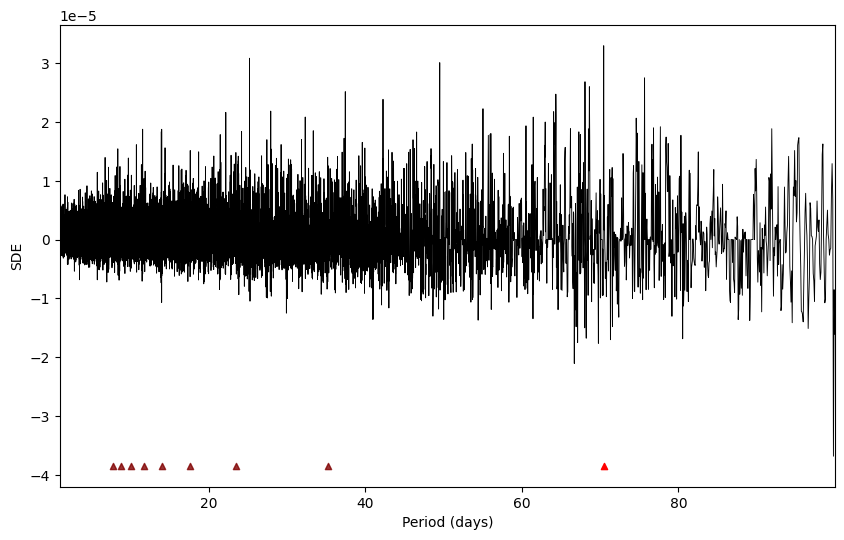

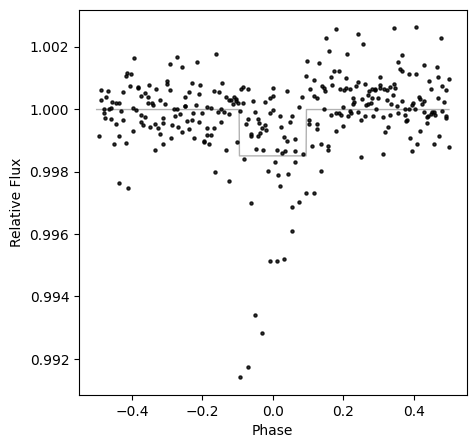

first 5 num stds [1.32687475 1.79310195 3.40588902 3.81782218 4.34125429]
reason: not rule_1 True, no good std True, len time == 0 False
done with BLS
per [] kept: False
running search on chunked data
BLS period 68.64694954942742  transit duration 3.12  hours;  duration in days:  0.13
planet run: BLS time  3.524058512846629 minutes


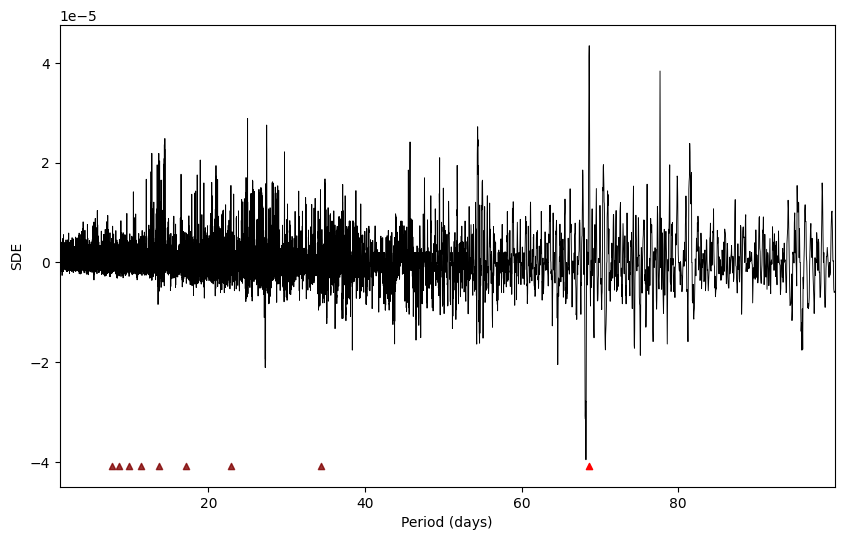

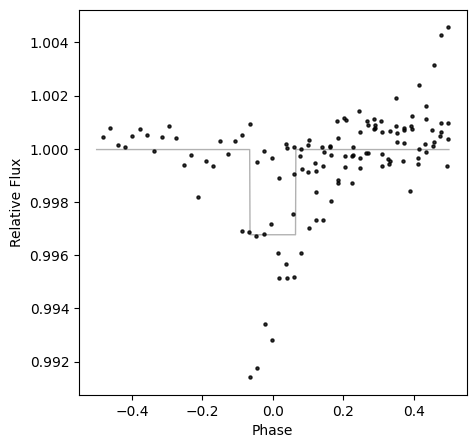

first 5 num stds [ 1.74708288  4.28835586  6.91507266  7.33628349 12.30932217]
checking for odd/even binaries
current t0 1723.3038058359837
new t0:  1791.9507553854112
number transit times in baseline: 4  
number of point in each transit:  [2 7 6 6]
keeping odd - would rather keep binary as 2 objects than miss a planet from period alias
kept this period 137.29389909885484


In [ ]:
# import matplotlib_inline
# %matplotlib ipympl
%matplotlib inline

try:
    file_factor = int(0)
except ValueError:
    
    sys.exit(1)
# file_num +=1000

time1 = tm.time()
target_files = glob.glob('./toi_data/target*')#[idx:]

[260708537, 235678745, 441738827, 259168516]
np.random.seed(53)

running_list = list(range(len(target_files)))
np.random.shuffle(running_list)
# my_file = [x for x in target_files if "201177276" in x]
# for jjj in bad_target_lst[3:]:
for jjj in target_files:
    try:
        main(jjj)
    except Exception as error:
        print(error)
    gc.collect()
#     break

time_end = tm.time()

print('time it took: ', (time_end-time1)/60, ' minutes')


In [ ]:
def using_BLS_recursive(time, flux, flux_err = None, intransit=None,
                            verbose=True, plot=True, max_planets=5,
                            min_SDE=2.5, min_delta_BIC=10, use_AIC=False,
                            periods=None, T0=None, Tdur=None, depths=None, first=False):
    """
    Recursive multi-planet search using GERBLS pyFastBLS + run_double and BIC/AIC-based model selection.
    """

    if intransit is None:
        intransit = np.zeros_like(time, dtype=bool)
    if flux_err is None:
        flux_err = np.std(flux) * np.ones_like(flux)

    if first:
        periods, T0, Tdur, depths = [], [], [], []

    # Mask in-transit points
    time_new, flux_new, flux_err_new = time[~intransit], flux[~intransit], flux_err[~intransit]
    if len(time_new) < 10:
        print("Stopping: insufficient data.")
        return np.array(periods), np.array(T0), np.array(Tdur), np.array(depths), intransit

    # Prepare data for BLS
    freq_fact_prelim = df/min(durations)*(np.nanmax(time_new)-np.nanmin(time_new))**2
    freq_fact_exp = np.ceil(np.log10(freq_fact_prelim))    

    start = tm.time()

    model     = BoxLeastSquares(time_new, flux_new)
    max_per   = np.min([100., (max(time_new)-min(time_new))*3/5])
    results   = model.autopower(durations, frequency_factor = np.max([10, (10**(freq_fact_exp-1))/2]), maximum_period=max_per)#, objective='snr', )

    end = tm.time()    

    my_median = running_median(results.power, kernel = min((25, int(len(time_new)/10))))
    results['power_final'] = results.power - my_median

    check_pwr_final_indxs = checking_last_BLS_power_for_artificial_inflation(results['power_final'])
    index = np.argmax(results.power_final[check_pwr_final_indxs])

    period = results.period[index]
    t0 = results.transit_time[index]
    duration = results.duration[index]
    depth = results.depth[index]

    # Compute SDE
    sde = (results['power_final'][idx] - np.median(results['power_final'])) / np.std(results['power_final'])
    if verbose:
        print(f"Candidate: P={period:.4f} d, SDE={sde:.2f}")

    
    if sde < min_SDE:
        print("Stopping: SDE below threshold.")
        return np.array(periods), np.array(T0), np.array(Tdur), np.array(depths), intransit

    if plot: # and np.ceil(results.duration[index]/np.nanmedian(np.diff(time)))>=3:
        plt.figure(figsize = (10, 6))
        val_triangles = min(results.power_final)-np.std(results.power_final)
        ax = plt.gca()
        ax.scatter(period, val_triangles, color = 'r', marker = '^', s=20, zorder = 10)

        plt.xlim(np.min(results.period), np.max(results.period))
        for n in range(2, 10):
            ax.scatter( n*period,val_triangles, color = 'maroon', marker = '^', s=20, zorder = 10, alpha= 0.8)
            ax.scatter(period / n,val_triangles, color = 'maroon', marker = '^', s=20, zorder = 10, alpha= 0.8)
        plt.ylabel(r'SDE')#, fontsize = 40)
        plt.xlabel('Period (days)')#, fontsize = 40)

        ax.plot(results.period, results.power_final, color = 'k', lw=0.65)

        plt.show()
        plt.close()
        if duration<period:
            plt.figure(figsize = (5, 5))
            ax2 = plt.gca()

            x = ((time_new - t0 + 0.5*period) % period) -( 0.5*period)
            m = np.abs(x) < 0.5
            ax2.scatter(
                x[m],
                flux_new[m],
                color='k',
                s=5,
                alpha=0.8,
                zorder=10)

            x_new = np.linspace(-0.5, 0.5, 1000)

            f = model.model(x_new + t0, period, duration, t0)

            ax2.plot(x_new, f, color='grey', lw = 1, alpha = 0.6, zorder = 5)
#             ax2.set_xlim(-0.5, 0.5)
            ax2.set_xlabel('Phase')#, color = 'k', fontsize = 40)
            ax2.set_ylabel('Relative Flux')#, color = 'k', fontsize = 40);
            plt.show()

    # Build models for likelihood
    model_flux = model.model(time_new, period, duration, t0)
    null_flux = np.ones_like(flux_new)

    logL_transit = compute_log_likelihood(flux_new, model_flux, flux_err_new)
    logL_null = compute_log_likelihood(flux_new, null_flux, flux_err_new)

    n, k = len(time_new), 4
    bic_transit = compute_BIC(logL_transit, n, k)
    bic_null = compute_BIC(logL_null, n, 1)
    delta_BIC = bic_null - bic_transit

    if verbose:
        print(f"ΔBIC={delta_BIC:.2f} (threshold={min_delta_BIC})")

    if use_AIC:
        aic_transit = compute_AIC(logL_transit, k)
        print(f"AIC={aic_transit:.2f}")

    if delta_BIC < min_delta_BIC:
        print("Candidate rejected: insufficient BIC improvement.")
        return np.array(periods), np.array(T0), np.array(Tdur), np.array(depths), intransit

    # Accept candidate
    periods.append(period)
    T0.append(t0)
    Tdur.append(duration)
    depths.append(depth)
    print('depths', depths)

    if verbose:
        print(f"Accepted planet: P={period:.4f} d")

    # Mask transits using your transit_mask
    intransit |= transit_mask(time, period, duration, t0)

    if len(periods) >= max_planets:
        print("Reached max planets.")
        return np.array(periods), np.array(T0), np.array(Tdur), np.array(depths), intransit

    # Recurse
    return using_BLS_recursive(time, flux, intransit=intransit,flux_err=flux_err,verbose=verbose, plot=plot, max_planets=max_planets,min_SDE=min_SDE, min_delta_BIC=min_delta_BIC, use_AIC=use_AIC,periods=periods, T0=T0, Tdur=Tdur, depths=depths, first=False)
